# **Western-Eastern Europe Growth**

In this project, I examine the growth in GDP per capita in different countries and regions, using the Maddison Project Data from 2023, and basing my analysis on the methods and procedures explained in Lecture 2 of "A First Course in Quantitative Economics with Python" by QuantEcon.

__Name__: Jorge Pineño

__LinkedIn__: www.linkedin.com/in/jorge-p-6118ba31b

In [197]:
# imports:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from collections import namedtuple

# **Countries**:

In [200]:
# use the 'raw' GitHub url to access the dataset (full data):
data_url = "https://github.com/JPineno/QuantEcon-A-First-Course-in-Quantitative-Economics-with-Python/raw/main/(2)%20Western-Eastern%20Europe%20Growth/Maddison%20Project%20Data%202023.xlsx"
data = pd.read_excel(data_url, 
                     sheet_name="Full data")
data.head()

,countrycode,country,region,year,gdppc,pop
0,AFG,Afghanistan,South and South East Asia,1,NaN,NaN
1,AFG,Afghanistan,South and South East Asia,730,NaN,NaN
2,AFG,Afghanistan,South and South East Asia,1000,NaN,NaN
3,AFG,Afghanistan,South and South East Asia,1090,NaN,NaN
4,AFG,Afghanistan,South and South East Asia,1150,NaN,NaN


In [201]:
# create a mapping between country codes and country names:
code_to_name = data[["countrycode", "country"]].drop_duplicates().set_index(["countrycode"])
code_to_name.head()

,country
countrycode,
AFG,Afghanistan
AGO,Angola
ALB,Albania
ARE,United Arab Emirates
ARG,Argentina


In [202]:
# focus on GDP per capita:
gdp_pc = data.set_index(["countrycode", "year"])["gdppc"]
gdp_pc.head()

countrycode  year
AFG          1      NaN
             730    NaN
             1000   NaN
             1090   NaN
             1150   NaN
Name: gdppc, dtype: float64

In [203]:
gdp_pc = gdp_pc.unstack("countrycode")
gdp_pc.tail()

countrycode,AFG,AGO,ALB,ARE,ARG,ARM,AUS,AUT,AZE,BDI,...,URY,USA,UZB,VEN,VNM,YEM,YUG,ZAF,ZMB,ZWE
year,,,,,,,,,,,,,,,,,,,,,
2018,1888.813928,7180.355235,11426.920105,74206.484938,18460.869009,11490.368687,49614.385976,43032.216404,16753.209691,730.904598,...,19697.759966,55454.669438,10682.417894,9446.187715,6842.138813,2281.544865,16824.553739,11873.299868,3521.505006,1900.199191
2019,2031.737349,6886.954136,11715.306318,74396.143863,17912.635765,12399.231837,49814.669956,43488.668121,17029.906374,738.983078,...,19714.148949,56469.263659,11219.242900,7061.761533,7266.048396,2265.343020,17524.212183,11739.935508,3466.236413,1753.024449
2020,1928.454683,6279.929085,11372.541421,70188.272728,15975.838773,11546.175310,48268.945077,40503.040806,16189.511047,720.445974,...,18460.038349,54379.206512,11341.919402,4952.529595,7395.361527,2031.443613,16757.938552,10839.133081,3270.599223,1585.972804
2021,1485.547006,6137.003845,12455.916554,72460.040688,17470.682415,12242.477472,50704.934853,42184.696121,16971.724515,723.192074,...,19222.295835,57522.704626,12076.091577,4896.801879,7507.758707,1972.210254,18491.681774,11273.159112,3321.594496,1687.253154
2022,1357.987823,6118.904897,12978.100729,77203.670241,18292.317825,13837.577589,52049.427952,43792.856400,17682.940199,717.228429,...,20181.939663,58487.465861,12559.401550,5267.175305,8050.358831,1959.319498,19352.383894,11415.886895,3342.421325,1703.529373


In [204]:
# create a color mapping to map a color to every country (code):
country_names = data["countrycode"]

# generate a colormap with the number of colors matching the number of countries:
colors = cm.tab20(np.linspace(0, 0.95, len(country_names)))

# create a dictionary to map each country to its corresponding color:
color_mapping = {country: color for 
                 country, color in zip(country_names, colors)}
color_mapping

{'AFG': array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 'AGO': array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 'ALB': array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 'ARE': array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 'ARG': array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 'ARM': array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 'AUS': array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 'AUT': array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 'AZE': array([0.68235294, 0.78039216, 0.90980392, 1.        ]),
 'BDI': array([0.68235294, 0.78039216, 0.90980392, 1.        ]),
 'BEL': array([0.68235294, 0.78039216, 0.90980392, 1.        ]),
 'BEN': array([0.68235294, 0.78039216, 0.90980392, 1.        ]),
 'BFA': array([0.68235294, 0.78039216, 0.90980392, 1.        ]),
 'BGD': array([0.68235294, 0.78039216, 0.90980392, 1.        ]),
 'BGR': array([0.68235294, 0.78039216, 0.90980392, 1.        ]),
 'BHR': array([0.68235294

<Axes: xlabel='year', ylabel='international dollars'>

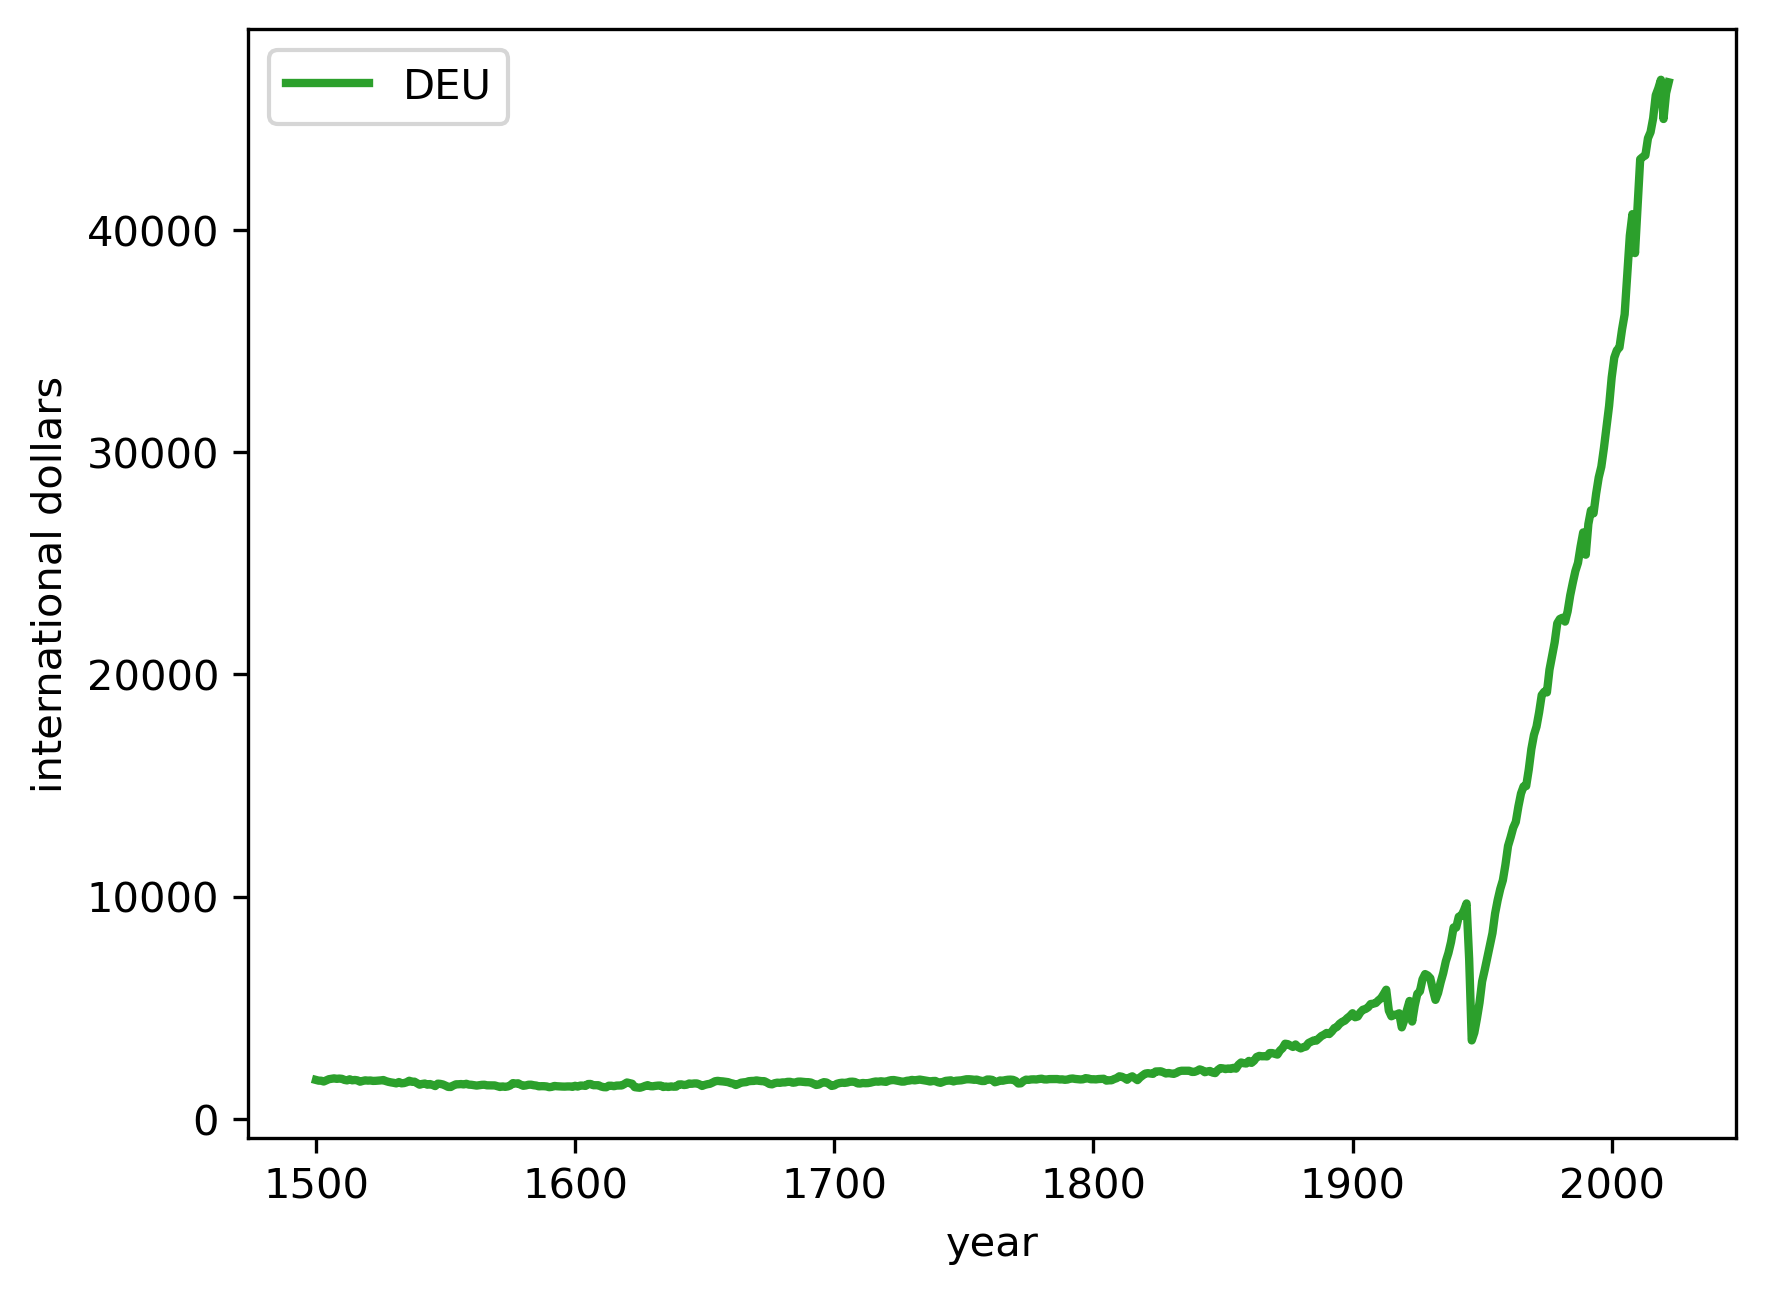

In [205]:
# plot GDP per capita evolution of Germany:
fig, ax = plt.subplots(dpi=300)
country = "DEU"
gdp_pc[country].plot(ax=ax,
        xlabel="year",
        ylabel="international dollars",
        lw=2,
        legend=True,
        color=color_mapping[country])

In [206]:
# check which countries are included in "Western Europe"
# and "Eastern Europe":
wes_eu = data["region"]=="Western Europe"
wes_eu = data[["countrycode", "country"]][wes_eu].drop_duplicates().set_index("countrycode")
eas_eu = data["region"]=="Eastern Europe"
eas_eu = data[["countrycode", "country"]][eas_eu].drop_duplicates().set_index("countrycode")
wes_eu, eas_eu

(                    country
 countrycode                
 AUT                 Austria
 BEL                 Belgium
 CHE             Switzerland
 DEU                 Germany
 DNK                 Denmark
 ESP                   Spain
 FIN                 Finland
 FRA                  France
 GBR          United Kingdom
 GRC                  Greece
 IRL                 Ireland
 ISL                 Iceland
 ITA                   Italy
 LUX              Luxembourg
 MLT                   Malta
 NLD             Netherlands
 NOR                  Norway
 PRT                Portugal
 SWE                  Sweden,
                             country
 countrycode                        
 ALB                         Albania
 ARM                         Armenia
 AZE                      Azerbaijan
 BGR                        Bulgaria
 BIH          Bosnia and Herzegovina
 BLR                         Belarus
 CSK                  Czechoslovakia
 CYP                          Cyprus
 CZE                

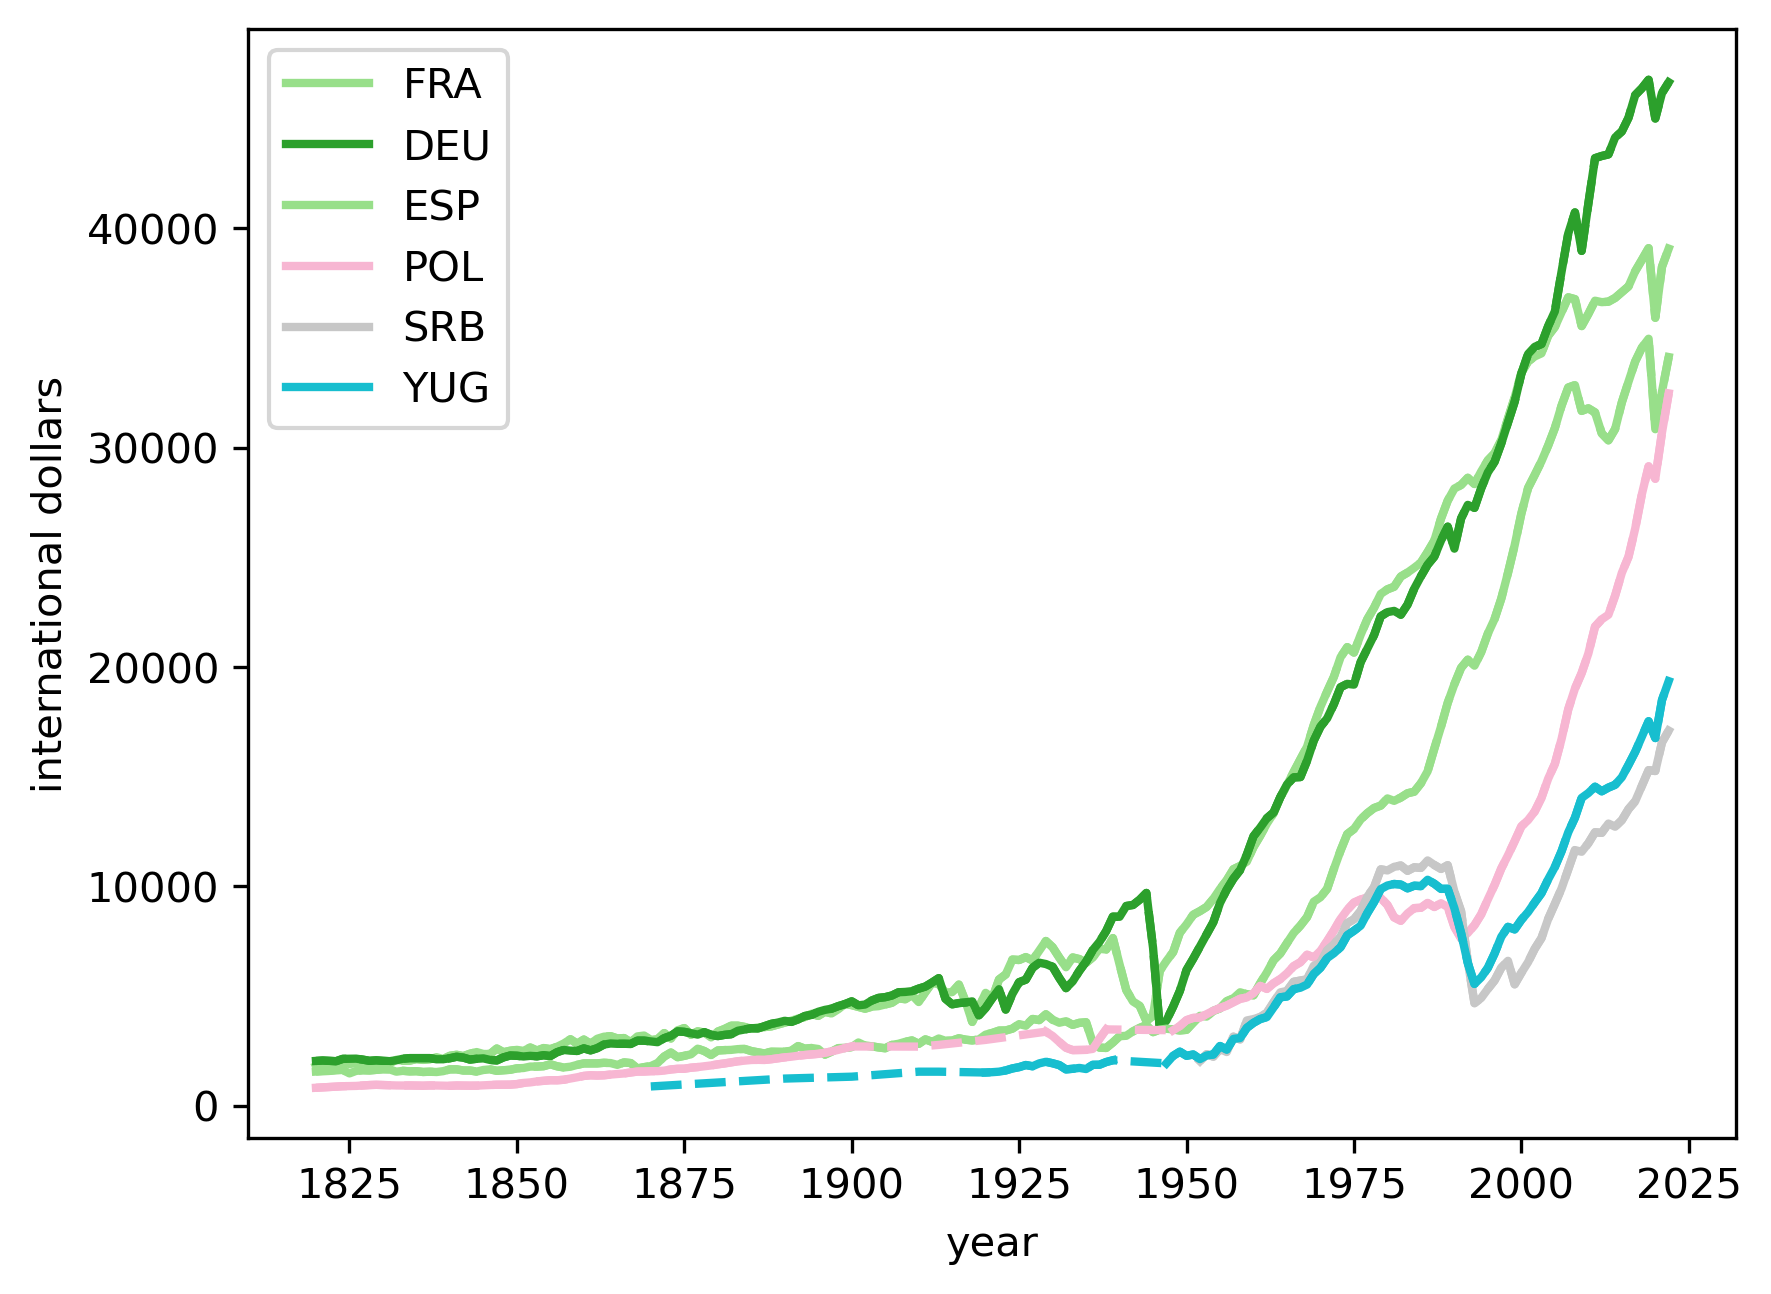

In [207]:
# plot GDP per capita evolution of 3 Western European and 3 Eastern European since 1820,
# interpolating for the years not covered in the data and showing those years with a dotted line:
fig, ax = plt.subplots(dpi=300)
country = "FRA", "DEU", "ESP", "POL", "SRB", "YUG"
for c in country:
    gdp_pc[c].loc[1820:].interpolate().plot(ax=ax,
                                            linestyle="--",
                                            lw=2,
                                            color=color_mapping[c])
    gdp_pc[c].loc[1820:].plot(ax=ax,
            lw=2,
            legend=True,
            color=color_mapping[c])
    ax.set_xlabel("year")
    ax.set_ylabel("international dollars")

# **Regions**:

In [317]:
# use the 'raw' GitHub url to access the dataset (regional data):
data_url = "https://github.com/JPineno/QuantEcon-A-First-Course-in-Quantitative-Economics-with-Python/raw/main/(2)%20Western-Eastern%20Europe%20Growth/Maddison%20Project%20Data%202023.xlsx"
reg_data = pd.read_excel(data_url, 
                     sheet_name="Regional data", 
                        header=(0, 1),
                        index_col=0)
reg_data.head()

Regional GDPpc based on all GDP pc and population estimates available  \
                                                                 East Asia   
1820                                         911.159926                      
1830                                         846.000000                      
1840                                         849.000000                      
1850                                         899.657658                      
1860                                                NaN                      

                                                                \
     Eastern Europe Latin America Middle East and North Africa   
1820    1044.538462    956.907120                   885.899599   
1830            NaN    925.000000                          NaN   
1840            NaN   1081.000000                          NaN   
1850    1290.561798   1067.858361                          NaN   
1860            NaN   1588.000000                          NaN   

                                                                  \
     South and South East Asia Sub Saharan Africa Western Europe   
1820                919.201211             1188.0    2170.704817   
1830                934.895891                NaN    2314.693145   
1840                938.789859                NaN    2528.164800   
1850                926.960126                NaN    2670.193221   
1860                888.648973                NaN    3028.877334   

                             World GDP pc                      \
     Western Offshoots Unnamed: 9_level_1 Unnamed: 10_level_1   
1820       2513.045418        1127.729974                 NaN   
1830       2886.763228                NaN                 NaN   
1840       3167.864246                NaN                 NaN   
1850       3474.410149        1300.501949                 NaN   
1860       4214.440703                NaN                 NaN   

     Regional Population                                \
                East Asia Eastern Europe Latin America   
1820             427757.0        91222.0       20704.0   
1830                  NaN            NaN           NaN   
1840                  NaN            NaN           NaN   
1850             455774.0       118161.0       30671.0   
1860                  NaN            NaN           NaN   

                                                                             \
     Middle East and North Africa South and South East Asia Sub Saharan SSA   
1820                      35936.0                  255695.0         60000.0   
1830                          NaN                       NaN             NaN   
1840                          NaN                       NaN             NaN   
1850                      42000.0                  278706.0         65000.0   
1860                          NaN                       NaN             NaN   

                                                        
     Western Europe Western Offshoots World Population  
1820       139472.0           11231.0        1042017.0  
1830            NaN               NaN              NaN  
1840            NaN               NaN              NaN  
1850       172226.0           26760.0        1189298.0  
1860            NaN               NaN              NaN

In [318]:
# modify reg_data to include only GDP per capita:
reg_data = reg_data.loc[:, "Regional GDPpc based on all GDP pc and population estimates available"]
reg_data.head()

,East Asia,Eastern Europe,Latin America,Middle East and North Africa,South and South East Asia,Sub Saharan Africa,Western Europe,Western Offshoots
1820,911.159926,1044.538462,956.907120,885.899599,919.201211,1188.0,2170.704817,2513.045418
1830,846.000000,NaN,925.000000,NaN,934.895891,NaN,2314.693145,2886.763228
1840,849.000000,NaN,1081.000000,NaN,938.789859,NaN,2528.164800,3167.864246
1850,899.657658,1290.561798,1067.858361,NaN,926.960126,NaN,2670.193221,3474.410149
1860,NaN,NaN,1588.000000,NaN,888.648973,NaN,3028.877334,4214.440703


In [319]:
# convert the index to a date time index, to be able to manipulate it better:
reg_data.index = pd.to_datetime(reg_data.index, format="%Y")

# interpolate based on time to fill in gaps in the dataset, to then plot it:
reg_data.interpolate(method="time", inplace=True)
reg_data.tail()

,East Asia,Eastern Europe,Latin America,Middle East and North Africa,South and South East Asia,Sub Saharan Africa,Western Europe,Western Offshoots
2018-01-01,18785.072936,19560.426291,14103.097039,19221.928826,7778.024622,3480.808282,40640.985765,53866.643338
2019-01-01,19580.744853,20051.041641,13957.886614,19088.289232,8027.965380,3488.155265,41090.757511,54730.807523
2020-01-01,19749.513807,19578.575165,12865.496160,18227.407774,7590.154167,3335.987170,38162.534402,52617.650014
2021-01-01,21157.305464,20696.989967,13610.788954,19162.692433,7983.716618,3398.578480,40164.142206,55576.019331
2022-01-01,21728.520436,20656.266307,14028.037763,19874.798159,8377.073733,3436.595715,41323.025189,56567.885831


In [320]:
# check the dtype of the index:
reg_data.index.dtype

dtype('<M8[ns]')

In [321]:
# create a list of the regions for later use:
regs = reg_data.columns
reg_names = []
reg_names += [name for name in regs]
reg_names

['East Asia',
 'Eastern Europe',
 'Latin America',
 'Middle East and North Africa',
 'South and South East Asia',
 'Sub Saharan Africa',
 'Western Europe',
 'Western Offshoots']

In [322]:
# generate a colormap with the number of colors matching the number of regions:
colors = cm.tab20(np.linspace(0, 0.95, len(reg_names)))

# create a dictionary to map each region to its corresponding color:
reg_color_mapping = {region: color for 
                 region, color in zip(reg_names, colors)}
reg_color_mapping

{'East Asia': array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 'Eastern Europe': array([1.        , 0.49803922, 0.05490196, 1.        ]),
 'Latin America': array([0.59607843, 0.8745098 , 0.54117647, 1.        ]),
 'Middle East and North Africa': array([0.58039216, 0.40392157, 0.74117647, 1.        ]),
 'South and South East Asia': array([0.54901961, 0.3372549 , 0.29411765, 1.        ]),
 'Sub Saharan Africa': array([0.96862745, 0.71372549, 0.82352941, 1.        ]),
 'Western Europe': array([0.7372549 , 0.74117647, 0.13333333, 1.        ]),
 'Western Offshoots': array([0.61960784, 0.85490196, 0.89803922, 1.        ])}

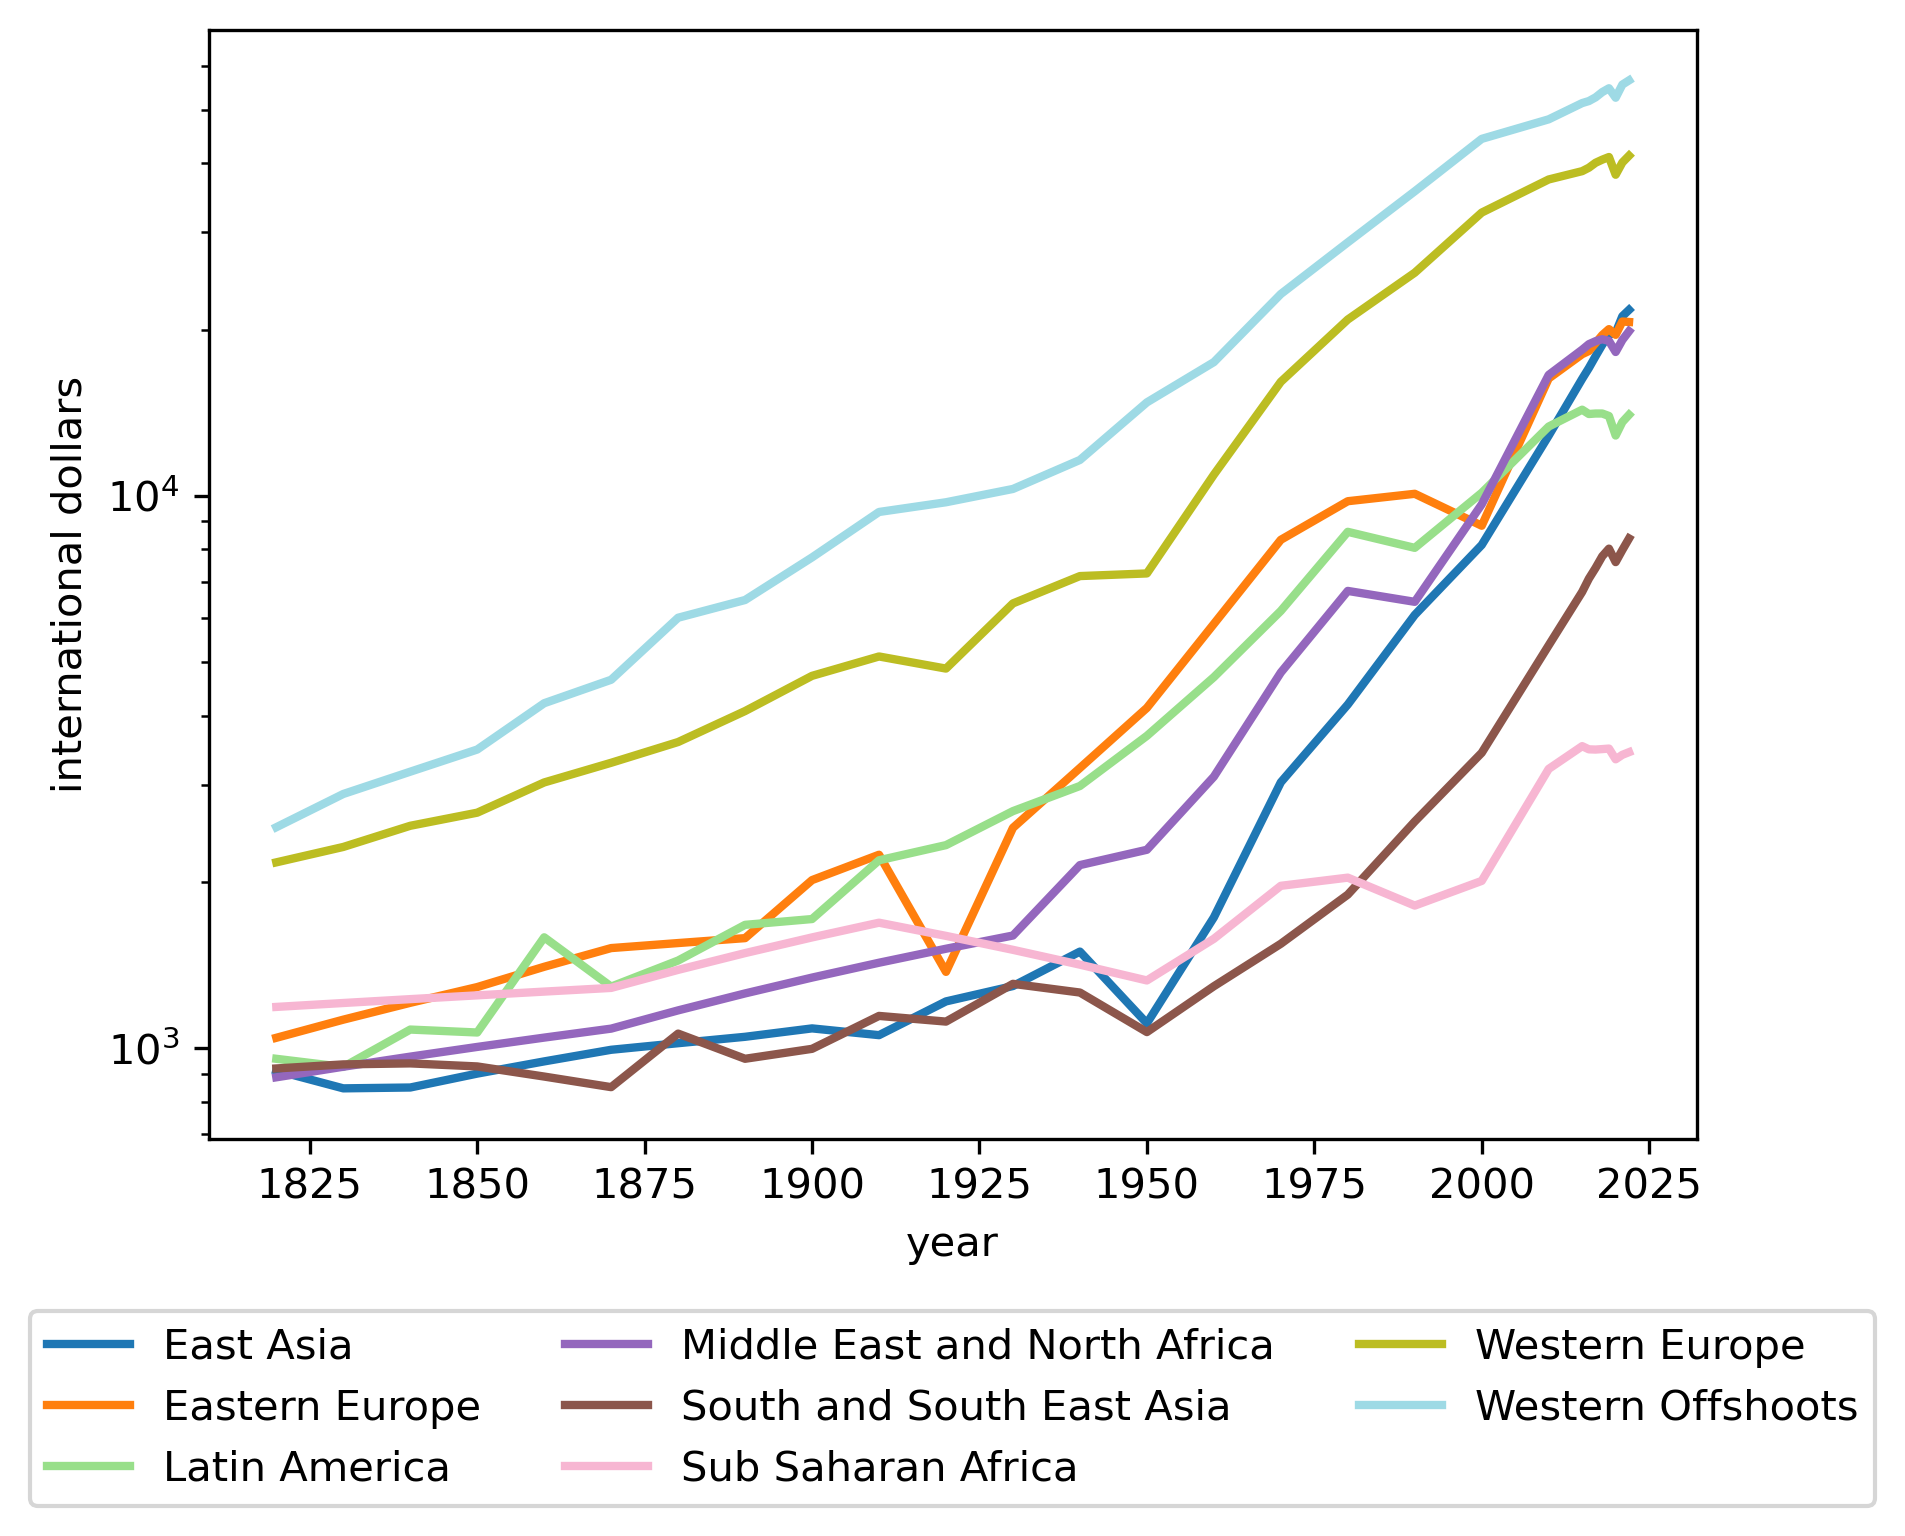

In [532]:
# plot our data for all regions:
fig, ax = plt.subplots(dpi=300)
reg_data.plot(ax=ax, 
              xlabel='year',
              lw=2,
              ylabel='international dollars',
              color=reg_color_mapping)
ax.set_yscale('log')
plt.legend(loc='lower center',
           ncol=3, bbox_to_anchor=[0.5, -0.35])
plt.show()

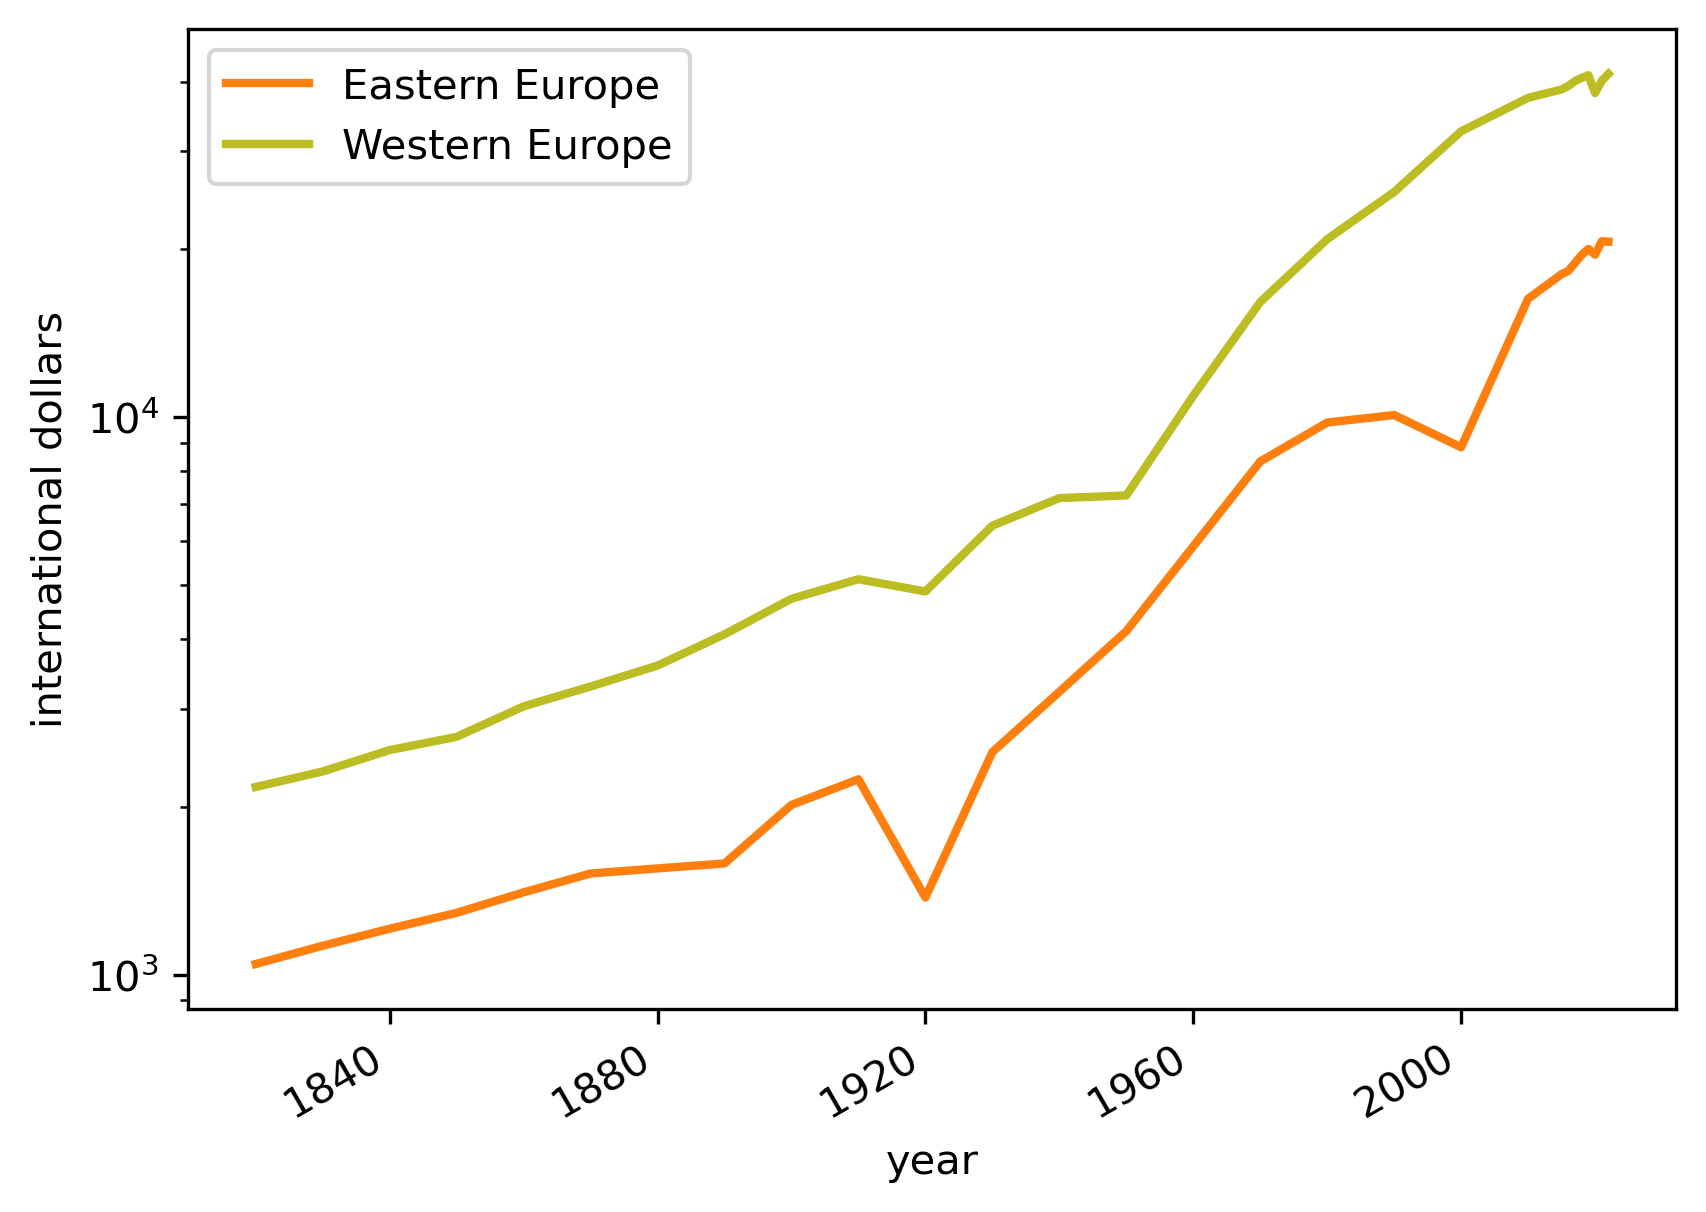

In [324]:
# plot our data for Western and Eastern Europe:
fig, ax = plt.subplots(dpi=300)
regs = "Eastern Europe", "Western Europe"
for r in regs:
    reg_data[r].plot(ax=ax, 
                  xlabel='year',
                  lw=2,
                  ylabel='international dollars', 
                  legend=True,
                  color=reg_color_mapping[r])
ax.set_yscale('log')
plt.show()

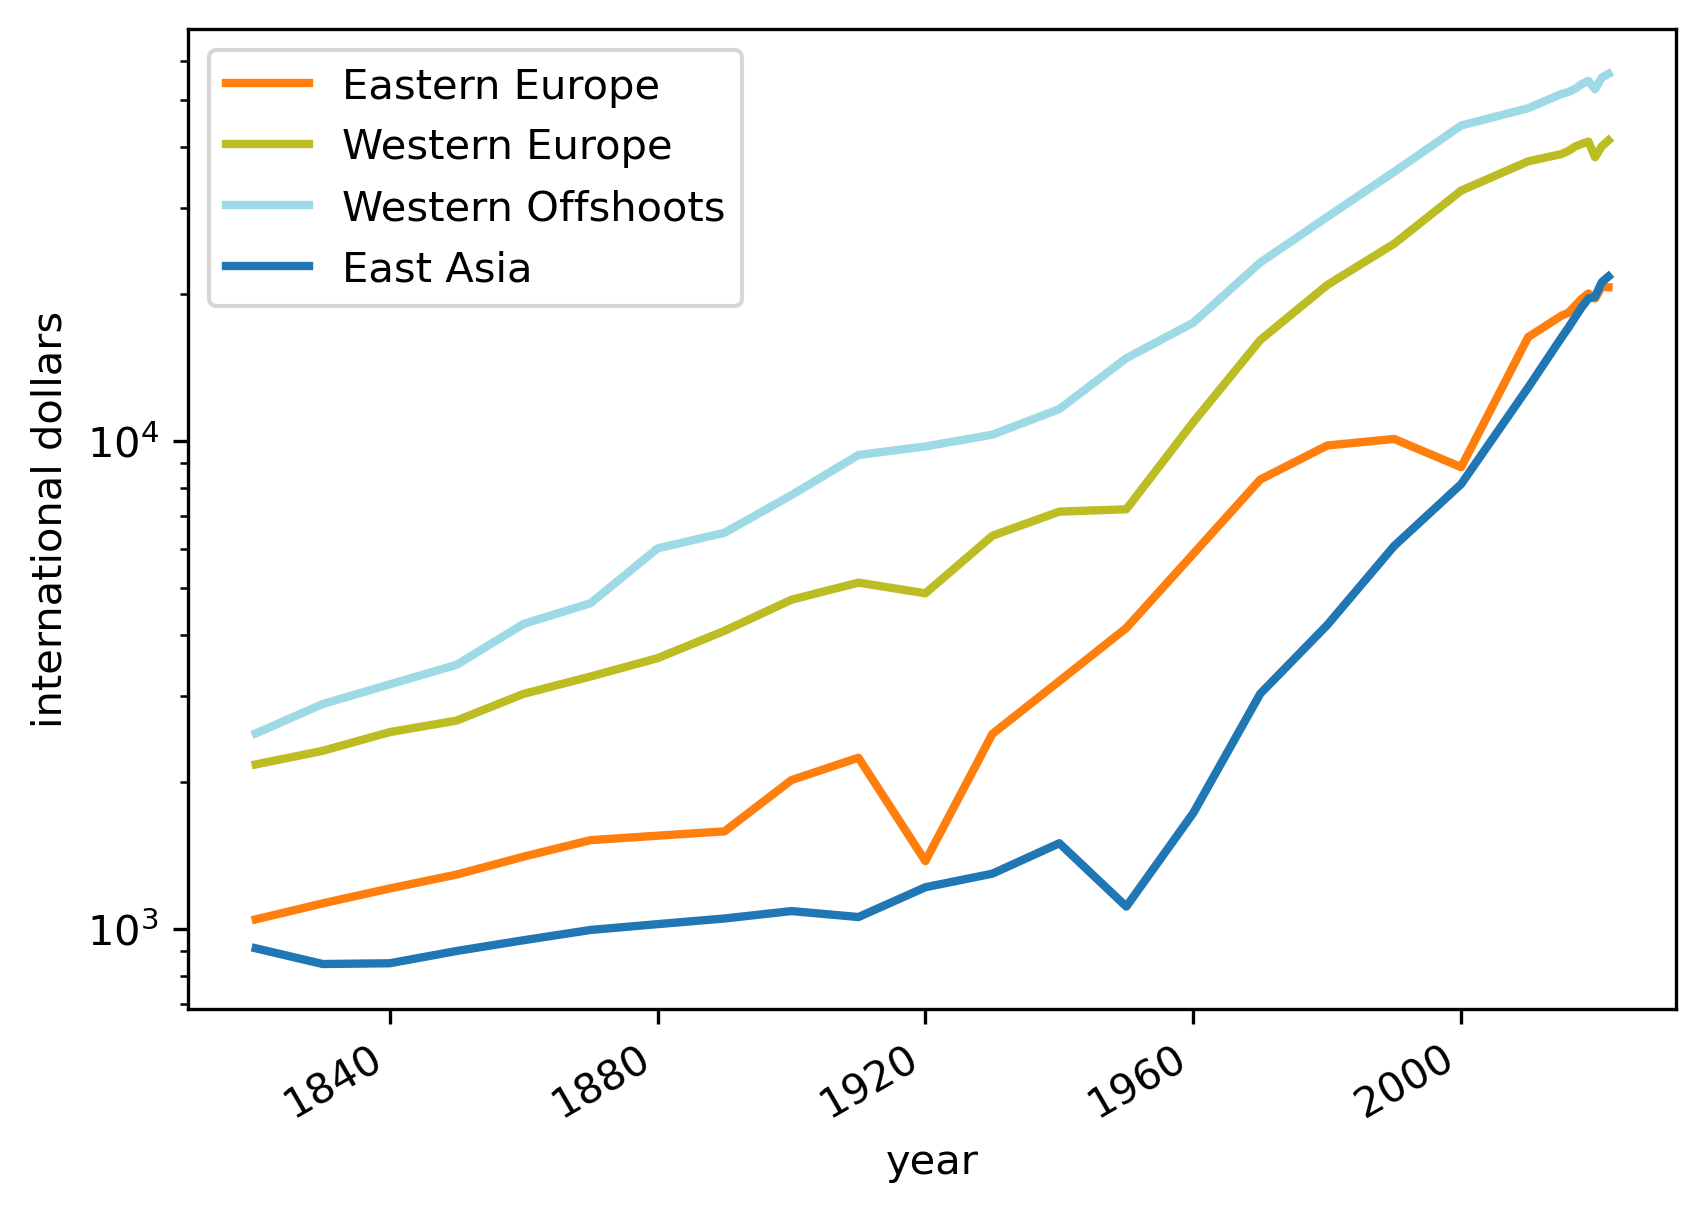

In [325]:
# compare Western and Eastern Europe with "Western Offshoots" and East Asia:
fig, ax = plt.subplots(dpi=300)
regs = "Eastern Europe", "Western Europe", "Western Offshoots", "East Asia"
for r in regs:
    reg_data[r].plot(ax=ax, 
                  xlabel='year',
                  lw=2,
                  ylabel='international dollars', 
                  legend=True,
                  color=reg_color_mapping[r])
ax.set_yscale('log')
plt.show()

In [335]:
# convert the index of our data back to integers for this last part:
reg_data.index = pd.to_datetime(reg_data.index).year
reg_data.head()

,East Asia,Eastern Europe,Latin America,Middle East and North Africa,South and South East Asia,Sub Saharan Africa,Western Europe,Western Offshoots
1820,911.159926,1044.538462,956.907120,885.899599,919.201211,1188.000000,2170.704817,2513.045418
1830,846.000000,1126.553724,925.000000,925.768924,934.895891,1207.602146,2314.693145,2886.763228
1840,849.000000,1208.546535,1081.000000,965.627335,938.789859,1227.198927,2528.164800,3167.864246
1850,899.657658,1290.561798,1067.858361,1005.496661,926.960126,1246.801073,2670.193221,3474.410149
1860,946.633194,1404.442799,1588.000000,1045.355072,888.648973,1266.397854,3028.877334,4214.440703


In [337]:
reg_data.index.dtype

dtype('int32')

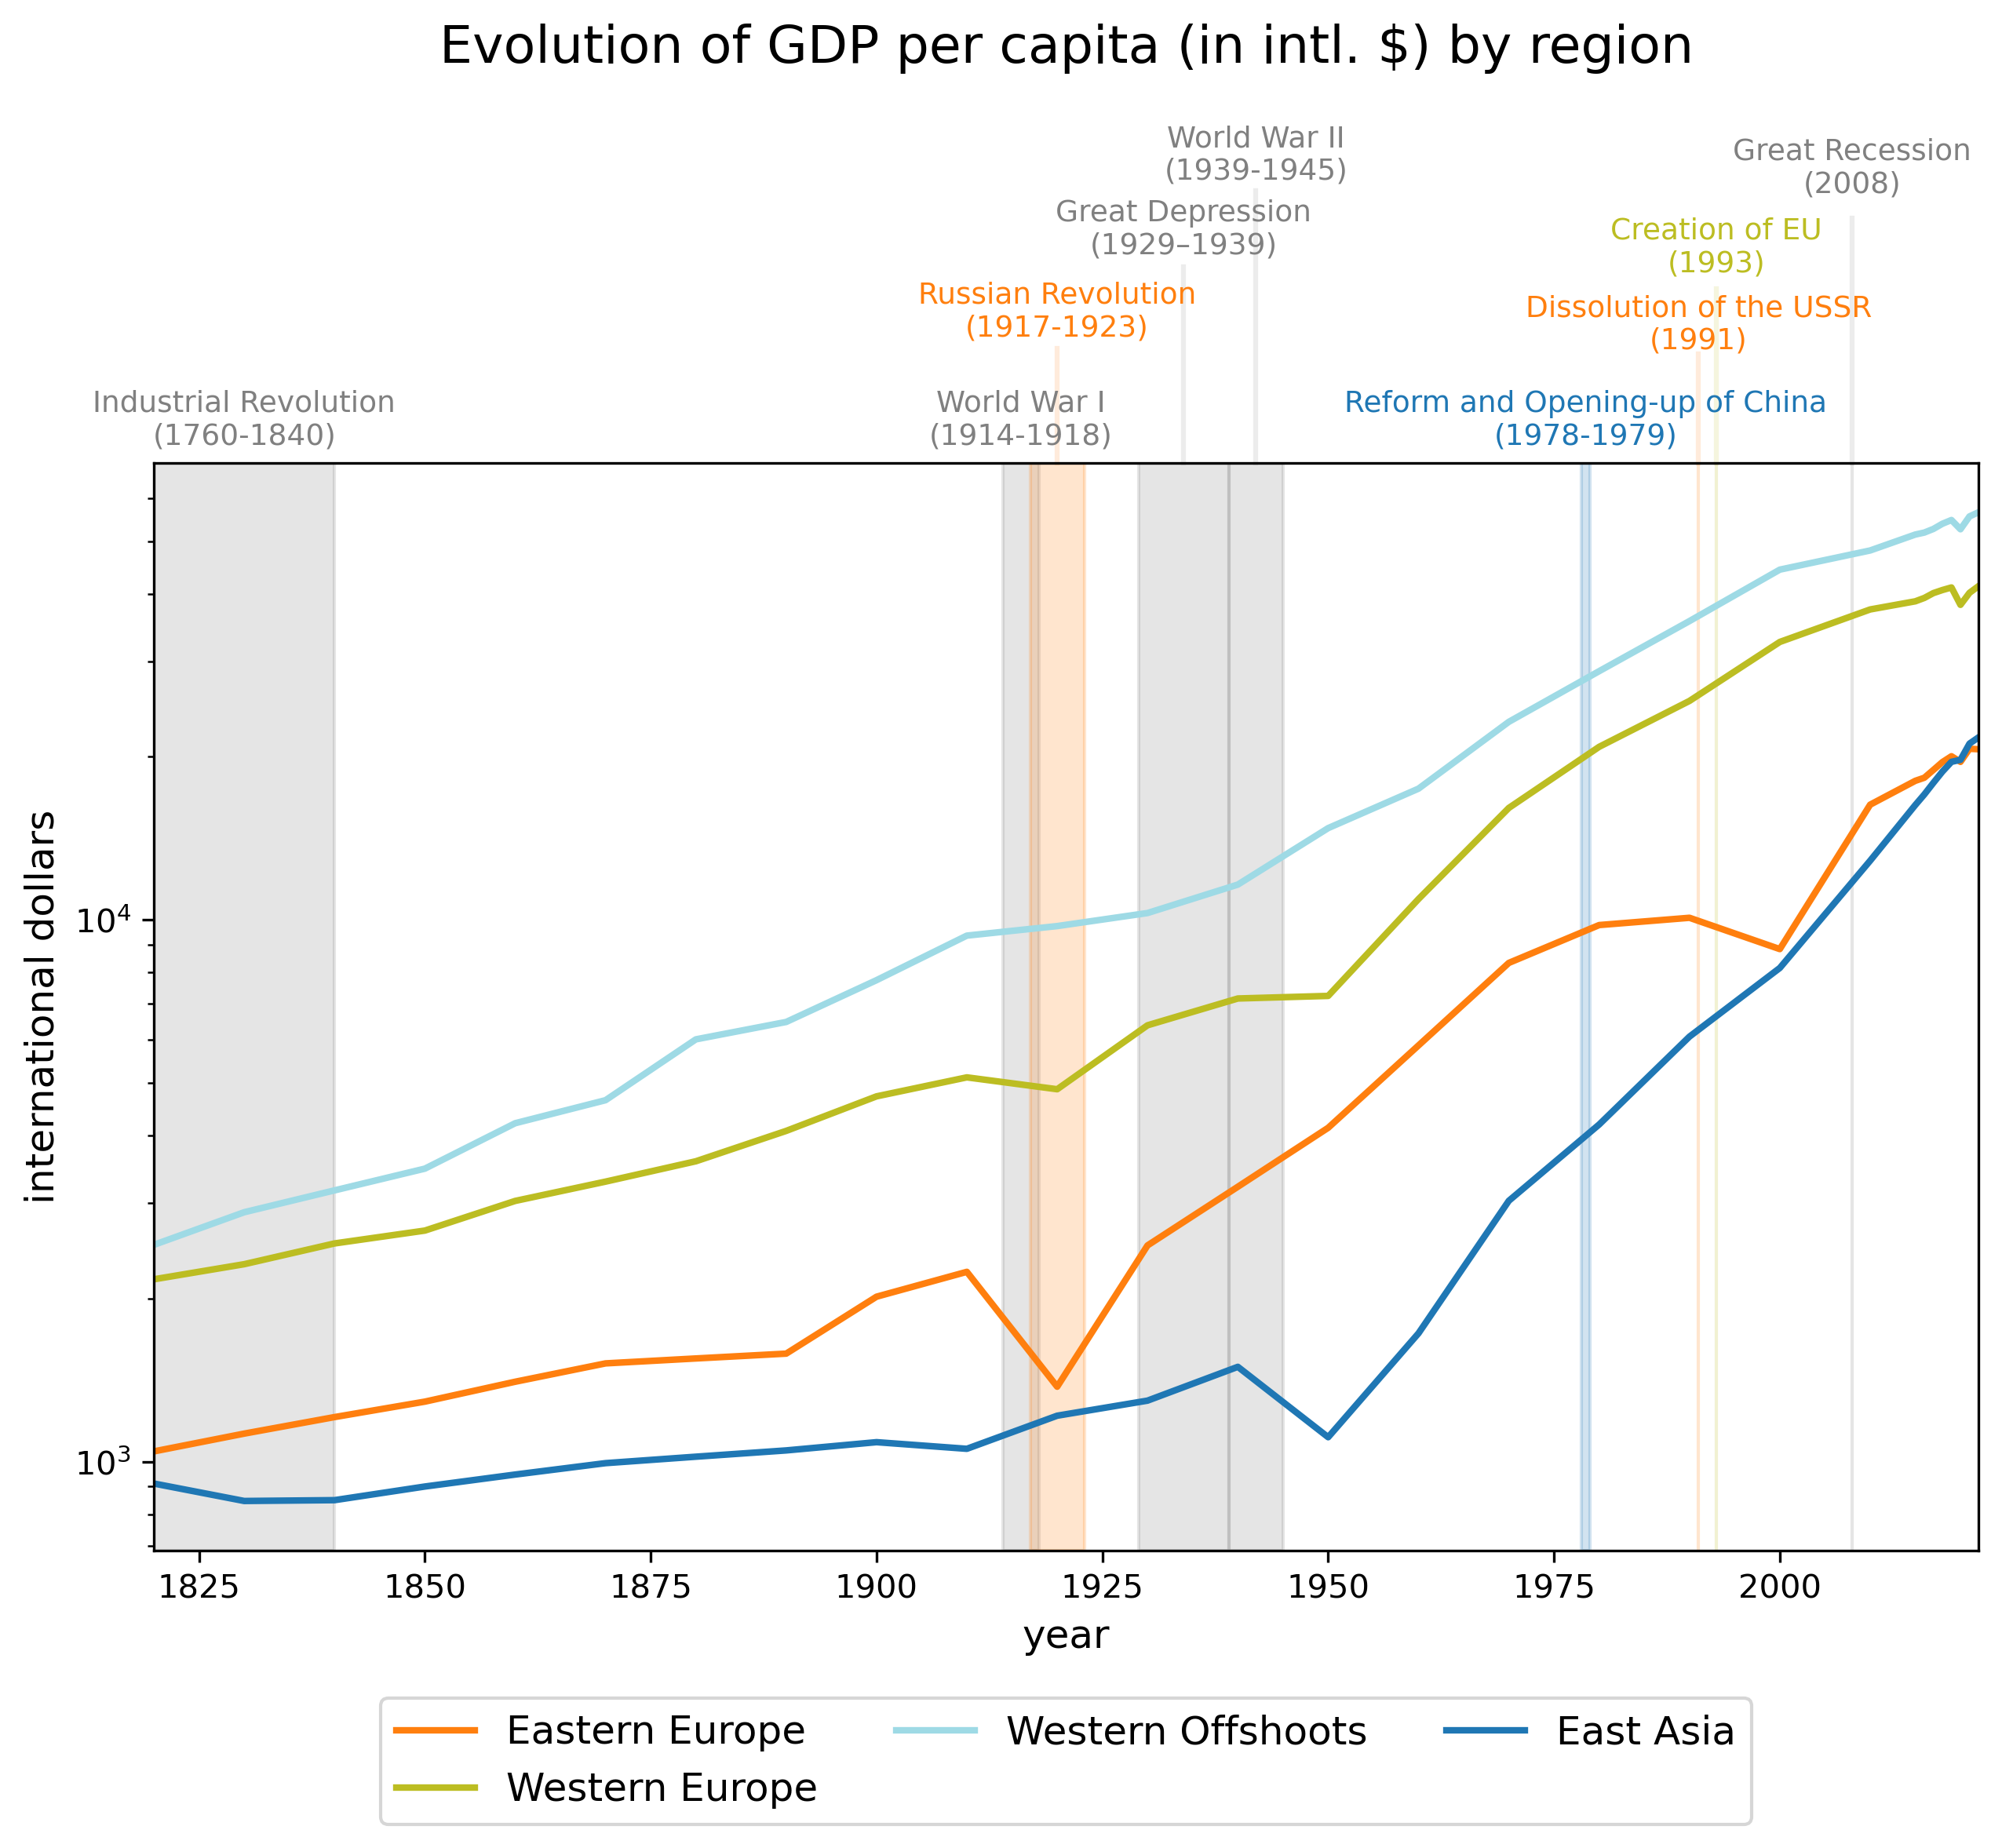

In [521]:
# introduce some historical events in our graph to see their effect:

# define the namedtuple for the events:
Event = namedtuple("Event", ["year_range", "y_text", "text", "color", "ymax"])

# define the parameters for the events and the text:
ylim = ax.get_ylim()[1]
b_params = {"color":"grey", "alpha": 0.2}
t_params = {"fontsize": 9, "va":"center", "ha":"center"}

# create our list of events:
events = [
    Event((1820, 1840), ylim + ylim*0.2, 
          "Industrial Revolution\n(1760-1840)", 
          "grey", 1),
    Event((1929, 1939), ylim + ylim*1.7, 
          "Great Depression\n(1929–1939)", 
          "grey", 1.18),
    Event((1978, 1979), ylim + ylim*0.2, 
          "Reform and Opening-up of China\n(1978-1979)", 
          reg_color_mapping["East Asia"], 1),
    Event((1914, 1918), ylim + ylim*0.2, 
          "World War I\n(1914-1918)", 
          "grey", 1),
    Event((1917, 1923), ylim + ylim*0.9, 
          "Russian Revolution\n(1917-1923)", 
          reg_color_mapping["Eastern Europe"], 1.105),
    Event((1939, 1945), ylim + ylim*2.7, 
          "World War II\n(1939-1945)", 
          "grey", 1.25),
    Event((1991, 1991), ylim + ylim*0.8, 
          "Dissolution of the USSR\n(1991)", 
          reg_color_mapping["Eastern Europe"], 1.1),
    Event((1993, 1993), ylim + ylim*1.5, 
          "Creation of EU\n(1993)", 
          reg_color_mapping["Western Europe"], 1.16),
    Event((2008, 2008), ylim + ylim*2.5, 
          "Great Recession\n(2008)", 
          "grey", 1.225),
]

# plot our events and the GDP per capita evolution of our regions:
regs = "Eastern Europe", "Western Europe", "Western Offshoots", "East Asia"
fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

def draw_events(events, ax):
    # Iterate over events and add annotations and vertical lines
    for event in events:
        event_mid = sum(event.year_range)/2
        ax.text(event_mid, 
                event.y_text, event.text, 
                color=event.color, **t_params)
        ax.axvspan(*event.year_range, color=event.color, alpha=0.2)
        ax.axvline(event_mid, ymin=1, ymax=event.ymax, color=event.color,
                   clip_on=False, alpha=0.15)
draw_events(events, ax)

regs = "Eastern Europe", "Western Europe", "Western Offshoots", "East Asia"
for r in regs:
    reg_data[r].plot(ax=ax,
                  lw=2,
                  color=reg_color_mapping[r])
    ax.set_xlim(left=1820, right=2022)

plt.xlabel("year", fontsize=12)
plt.ylabel("international dollars", fontsize=12)
plt.legend(loc='lower center', ncol=3, bbox_to_anchor=[0.5, -0.27], fontsize=12)
plt.title("Evolution of GDP per capita (in intl. $) by region", y=1.35, fontsize=16)
ax.set_yscale('log')